# The goal here is to have a cleaned data so we can know the performance of the employees

1- Load data and handle missing value

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# For better visualization
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset
# Replace 'garment_productivity.csv' with your actual filename path in your laptop
df = pd.read_csv('/content/garments_worker_productivity.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Information:")
df.info()

print("\nFirst few rows of the dataset:")
print(df.head())

print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values Count:")
missing_values = df.isnull().sum()
print(missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Dataset Shape: (1197, 15)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_p

42% of the row has a missing wip value <br/>
=> Checking correlation to see if it is okay for me to delete wip

Numeric columns in the dataset:
['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

Correlation Matrix:
                           team  targeted_productivity       smv       wip  \
team                   1.000000               0.030274 -0.110011 -0.033474   
targeted_productivity  0.030274               1.000000 -0.069489  0.062054   
smv                   -0.110011              -0.069489  1.000000 -0.037837   
wip                   -0.033474               0.062054 -0.037837  1.000000   
over_time             -0.096737              -0.088557  0.674887  0.022302   
incentive             -0.007674               0.032768  0.032629  0.167210   
idle_time              0.003796              -0.056181  0.056863 -0.026299   
idle_men               0.026974              -0.053818  0.105901 -0.048718   
no_of_style_change    -0.011194              -0.209294  0.315388 -0.072357   
no_of_

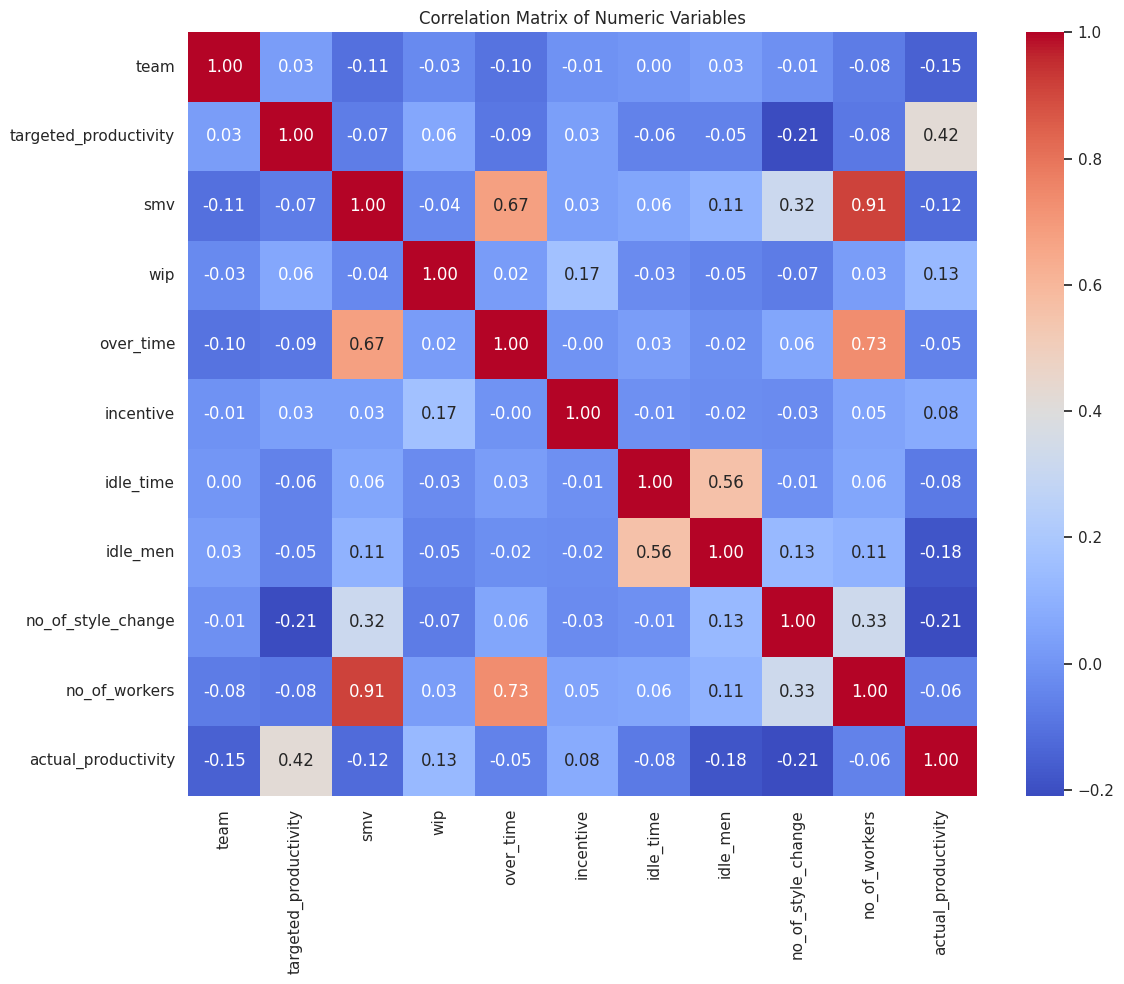


Correlations with actual_productivity (sorted):
actual_productivity      1.000000
targeted_productivity    0.421594
wip                      0.131147
incentive                0.076538
over_time               -0.054206
no_of_workers           -0.057991
idle_time               -0.080851
smv                     -0.122089
team                    -0.148753
idle_men                -0.181734
no_of_style_change      -0.207366
Name: actual_productivity, dtype: float64

Correlations with wip (sorted):
wip                      1.000000
incentive                0.167210
actual_productivity      0.131147
targeted_productivity    0.062054
no_of_workers            0.030383
over_time                0.022302
idle_time               -0.026299
team                    -0.033474
smv                     -0.037837
idle_men                -0.048718
no_of_style_change      -0.072357
Name: wip, dtype: float64

Correlation between wip and actual_productivity: 0.1311


In [48]:
# Let's examine correlations between all numeric variables

# First, select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns in the dataset:")
print(numeric_cols.tolist())

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# Check correlations with actual_productivity (our target variable)
productivity_correlations = correlation_matrix['actual_productivity'].sort_values(ascending=False)
print("\nCorrelations with actual_productivity (sorted):")
print(productivity_correlations)

# Check correlations with wip specifically
# Note: This will include only rows where wip is not null
wip_correlations = df.dropna(subset=['wip'])[numeric_cols].corr()['wip'].sort_values(ascending=False)
print("\nCorrelations with wip (sorted):")
print(wip_correlations)

# Let's also check the correlation between wip and actual_productivity directly
wip_productivity_corr = df.dropna(subset=['wip'])['wip'].corr(df.dropna(subset=['wip'])['actual_productivity'])
print(f"\nCorrelation between wip and actual_productivity: {wip_productivity_corr:.4f}")

=> So I will use deletion for wip based on that conclusion

In [49]:
df.drop(columns=['wip'], inplace=True)

In [50]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1197, 14)


2- Scale <br/>
=> I will use zscore cause it is mostly used for most features (and sensitive to outliers as well) <br/>
AI agent response: https://chatgpt.com/share/67d00714-9948-8012-a390-7f24d77bfbca

In [51]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Identify columns
standard_scaling_cols = ['smv', 'targeted_productivity', 'no_of_workers', 'actual_productivity']
robust_scaling_cols = ['over_time', 'idle_time']

# Apply Standard Scaler
scaler_standard = StandardScaler()
df[standard_scaling_cols] = scaler_standard.fit_transform(df[standard_scaling_cols])

# Apply Robust Scaler for outlier-sensitive data
scaler_robust = RobustScaler()
df[robust_scaling_cols] = scaler_robust.fit_transform(df[robust_scaling_cols])
df.describe()


,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1.197000e+03,1.197000e+03,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1.197000e+03,1.197000e+03
mean,6.426901,-3.531938e-16,9.942849e-17,0.110047,38.210526,0.730159,0.369256,0.150376,-3.784219e-17,-2.374412e-17
std,3.463963,1.000418e+00,1.000418e+00,0.606671,160.182643,12.709757,3.268987,0.427848,1.000418e+00,1.000418e+00
min,1.000000,-6.741257e+00,-1.111853e+00,-0.717391,0.000000,0.000000,0.000000,0.000000,-1.469680e+00,-2.874670e+00
25%,3.000000,-3.028349e-01,-1.016778e+00,-0.456522,0.000000,0.000000,0.000000,0.000000,-1.154200e+00,-4.861047e-01
50%,6.000000,2.081510e-01,1.808523e-02,0.000000,0.000000,0.000000,0.000000,0.000000,-2.748543e-02,2.192600e-01
75%,9.000000,7.191368e-01,8.408561e-01,0.543478,50.000000,0.000000,0.000000,0.000000,1.009092e+00,6.602725e-01
max,12.000000,7.191368e-01,3.610851e+00,3.978261,3600.000000,300.000000,45.000000,2.000000,2.451286e+00,2.209365e+00


3- EDA

In [52]:
continuous_cols = [
    'smv',
    'targeted_productivity',
    'over_time',
    'incentive',
    'idle_time',
    'idle_men',
    'no_of_workers',
    'actual_productivity'
]

###Numerical method for EDA

Descriptive statistics

In [53]:
# Descriptive statistics
descriptive_stats = df[continuous_cols].describe()
print(descriptive_stats)

                smv  targeted_productivity    over_time    incentive  \
count  1.197000e+03           1.197000e+03  1197.000000  1197.000000   
mean   9.942849e-17          -3.531938e-16     0.110047    38.210526   
std    1.000418e+00           1.000418e+00     0.606671   160.182643   
min   -1.111853e+00          -6.741257e+00    -0.717391     0.000000   
25%   -1.016778e+00          -3.028349e-01    -0.456522     0.000000   
50%    1.808523e-02           2.081510e-01     0.000000     0.000000   
75%    8.408561e-01           7.191368e-01     0.543478    50.000000   
max    3.610851e+00           7.191368e-01     3.978261  3600.000000   

         idle_time     idle_men  no_of_workers  actual_productivity  
count  1197.000000  1197.000000   1.197000e+03         1.197000e+03  
mean      0.730159     0.369256  -3.784219e-17        -2.374412e-17  
std      12.709757     3.268987   1.000418e+00         1.000418e+00  
min       0.000000     0.000000  -1.469680e+00        -2.874670e+00  
2

Correlation Matrix

In [54]:
# Compute correlation
correlation_matrix = df[continuous_cols].corr()

print(correlation_matrix)

                            smv  targeted_productivity  over_time  incentive  \
smv                    1.000000              -0.069489   0.674887   0.032629   
targeted_productivity -0.069489               1.000000  -0.088557   0.032768   
over_time              0.674887              -0.088557   1.000000  -0.004793   
incentive              0.032629               0.032768  -0.004793   1.000000   
idle_time              0.056863              -0.056181   0.031038  -0.012024   
idle_men               0.105901              -0.053818  -0.017913  -0.021140   
no_of_workers          0.912176              -0.084288   0.734164   0.049222   
actual_productivity   -0.122089               0.421594  -0.054206   0.076538   

                       idle_time  idle_men  no_of_workers  actual_productivity  
smv                     0.056863  0.105901       0.912176            -0.122089  
targeted_productivity  -0.056181 -0.053818      -0.084288             0.421594  
over_time               0.031038 -0.

Outliers detection

In [55]:
import numpy as np
from scipy.stats import zscore

# Calculate the Z-scores for each continuous column
z_scores = df[continuous_cols].apply(zscore)

# Check which values are outliers (absolute z-score > 3)
outliers = (z_scores > 3) | (z_scores < -3)

# Get the indices of the rows where outliers are present
outlier_indices = df[outliers.any(axis=1)].index

print("Outlier indices:", outlier_indices)

Outlier indices: Index([ 138,  139,  146,  191,  194,  209,  214,  216,  237,  239,  255,  257,
        259,  287,  303,  316,  332,  336,  350,  367,  383,  384,  414,  455,
        476,  479,  494,  537,  615,  617,  633,  650,  654,  685,  689,  690,
        705,  715,  729,  735,  748,  818,  822,  841,  843,  848,  860,  880,
        882,  958,  961,  996, 1001, 1040, 1046, 1085, 1086, 1091, 1128, 1129,
       1130, 1133, 1137, 1138, 1139, 1143, 1148, 1149],
      dtype='int64')


# Deal directly with the outliers

In [ ]:
# Remove rows with outliers based on the indices provided
outlier_indices = [138, 139, 146, 191, 194, 209, 214, 216, 237, 239, 255, 257,
                   259, 287, 303, 316, 332, 336, 350, 367, 383, 384, 414, 455,
                   476, 479, 494, 537, 615, 617, 633, 650, 654, 685, 689, 690,
                   705, 715, 729, 735, 748, 818, 822, 841, 843, 848, 860, 880,
                   882, 958, 961, 996, 1001, 1040, 1046, 1085, 1086, 1091, 1128,
                   1129, 1130, 1133, 1137, 1138, 1139, 1143, 1148, 1149]

df_cleaned = df.drop(index=outlier_indices)

# Check if the outliers are removed
print(df_cleaned.shape)

Normality test

In [56]:
from scipy.stats import shapiro

for col in continuous_cols:
    stat, p_value = shapiro(df[col])
    print(f'{col}: p-value = {p_value}')
    if p_value > 0.05:
        print(f"{col} follows a normal distribution.")
    else:
        print(f"{col} does NOT follow a normal distribution.")

smv: p-value = 1.5818186979900694e-31
smv does NOT follow a normal distribution.
targeted_productivity: p-value = 9.096996754912172e-41
targeted_productivity does NOT follow a normal distribution.
over_time: p-value = 9.320972695710135e-27
over_time does NOT follow a normal distribution.
incentive: p-value = 1.6122624307524022e-58
incentive does NOT follow a normal distribution.
idle_time: p-value = 8.131311232290709e-61
idle_time does NOT follow a normal distribution.
idle_men: p-value = 1.0482499424867543e-59
idle_men does NOT follow a normal distribution.
no_of_workers: p-value = 2.414642303363157e-37
no_of_workers does NOT follow a normal distribution.
actual_productivity: p-value = 6.87126061109675e-21
actual_productivity does NOT follow a normal distribution.


###Graphical method for EDA

Scatterplot

<Figure size 1200x1000 with 0 Axes>

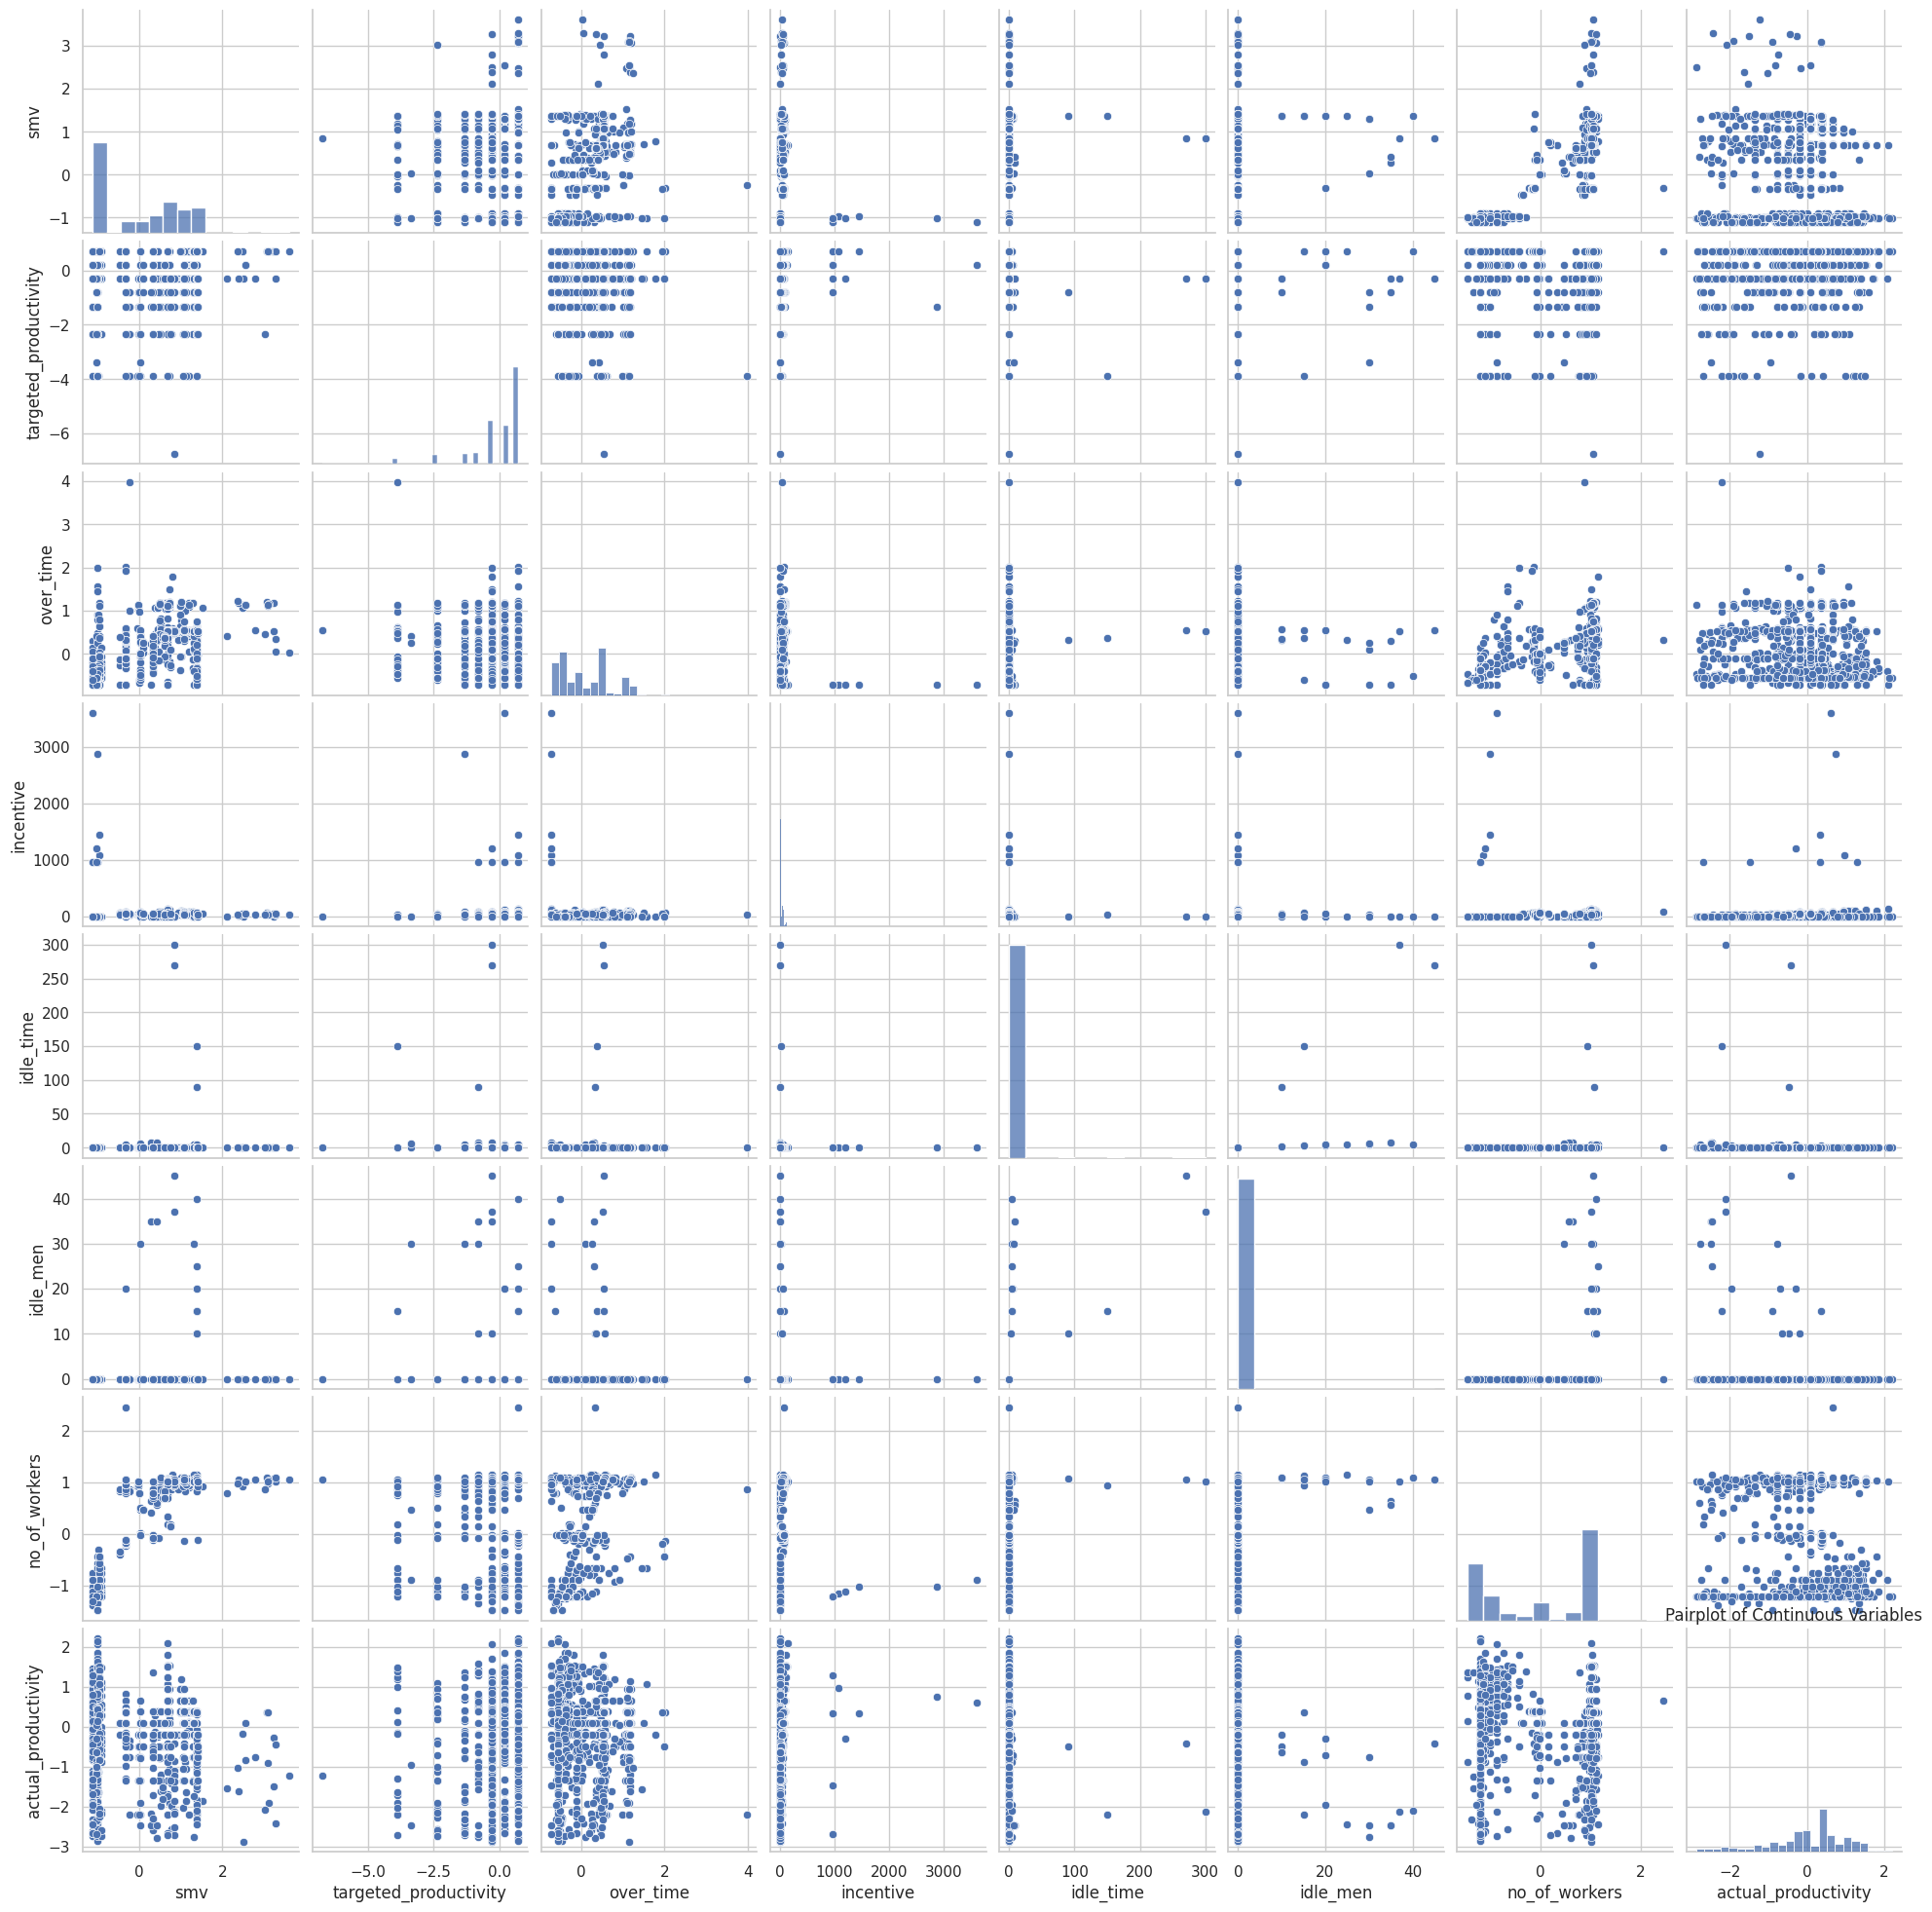

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Scatterplots for relationships between pairs of continuous variables
plt.figure(figsize=(12, 10))
sns.pairplot(df[continuous_cols])
plt.title('Pairplot of Continuous Variables')
plt.show()


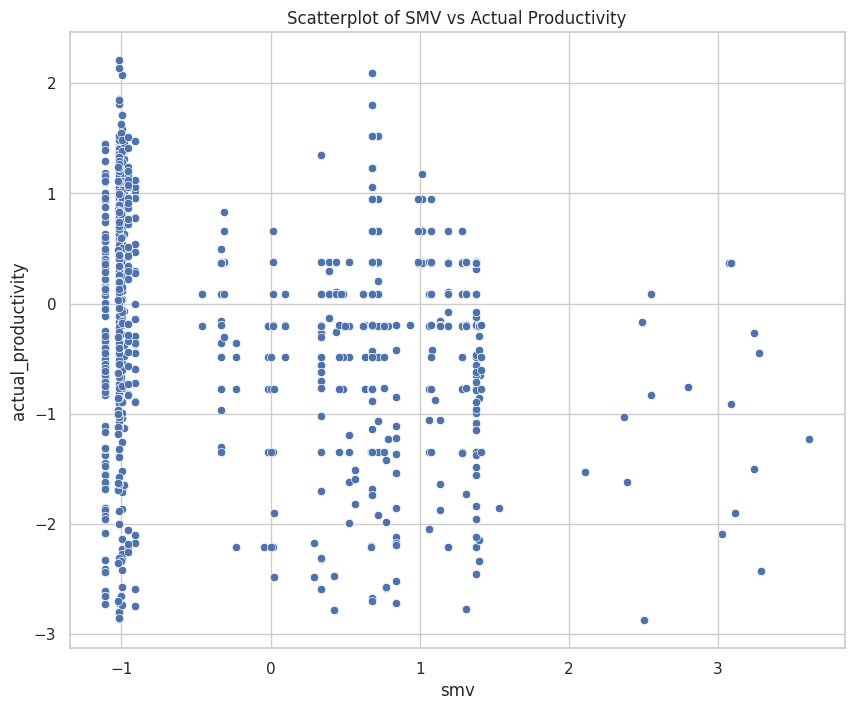

In [58]:
# Scatterplots for specific pairs that may have strong relationships
# Scatterplot of 'smv' vs 'actual_productivity' (example)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='smv', y='actual_productivity', data=df)
plt.title('Scatterplot of SMV vs Actual Productivity')
plt.show()

Histograms

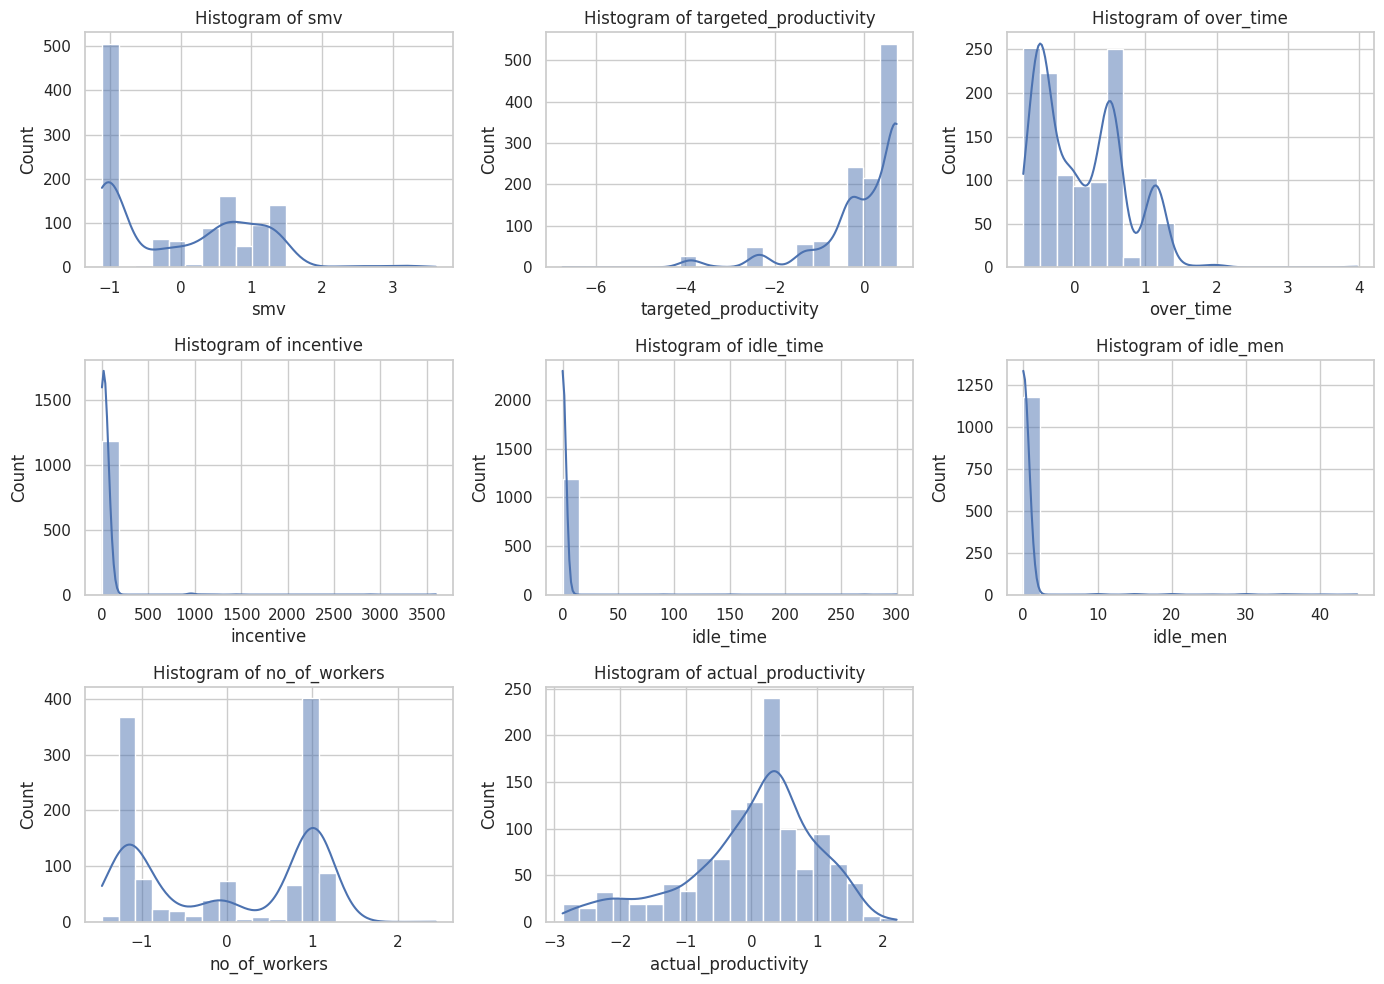

In [59]:
# Histograms for each continuous variable
plt.figure(figsize=(14, 10))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(3, 3, i)  # Grid of 3 rows and 3 columns
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
plt.show()

Boxplots

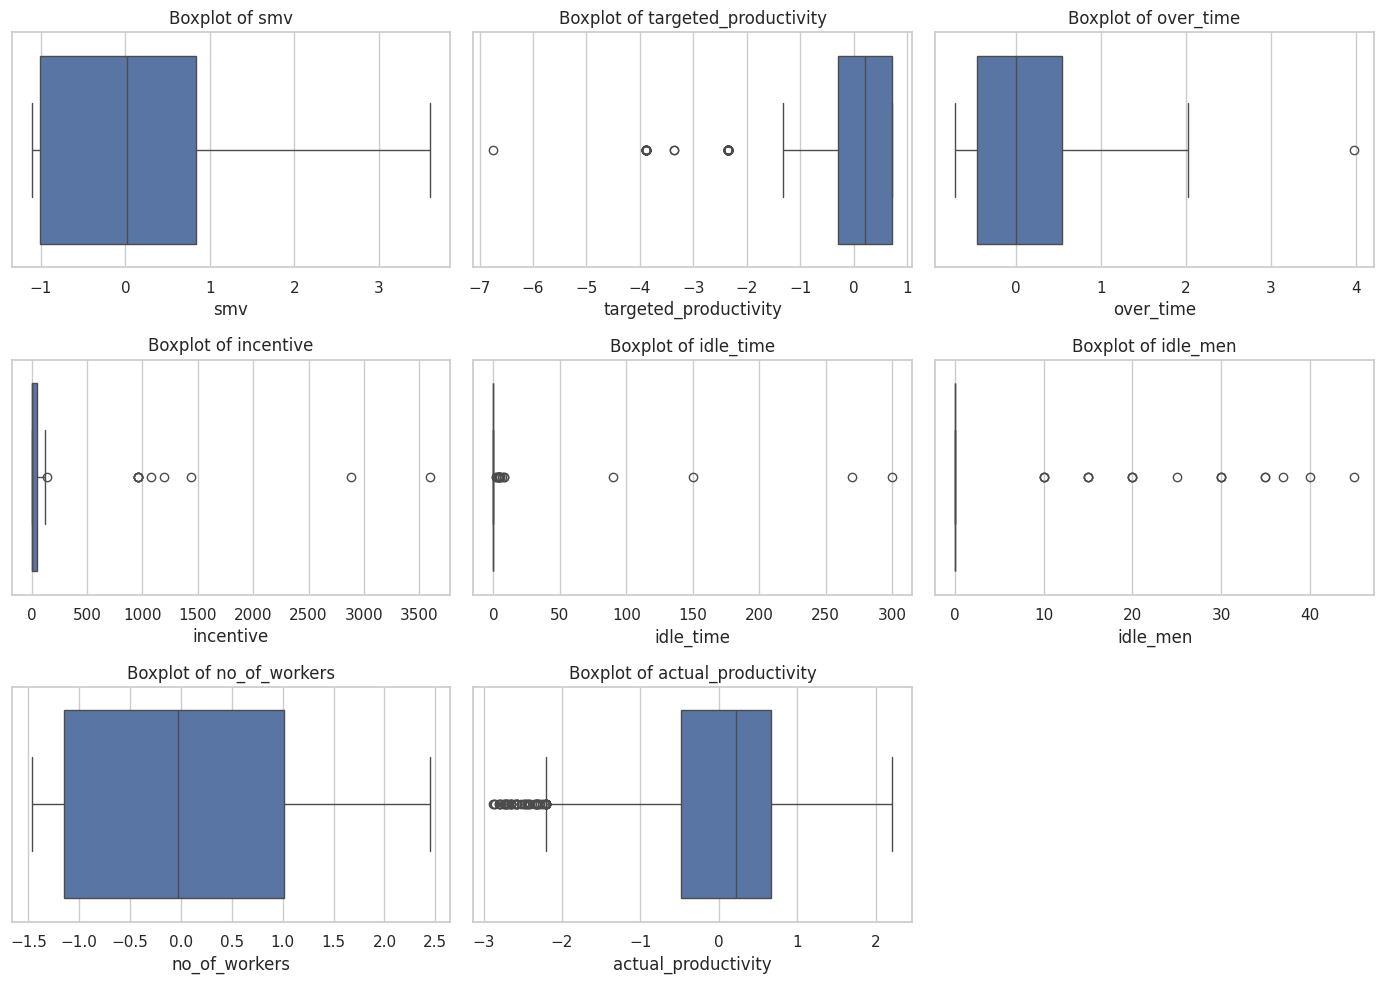

In [60]:
# Boxplots for each continuous variable to detect outliers
plt.figure(figsize=(14, 10))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(3, 3, i)  # Grid of 3 rows and 3 columns
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

Heatmap

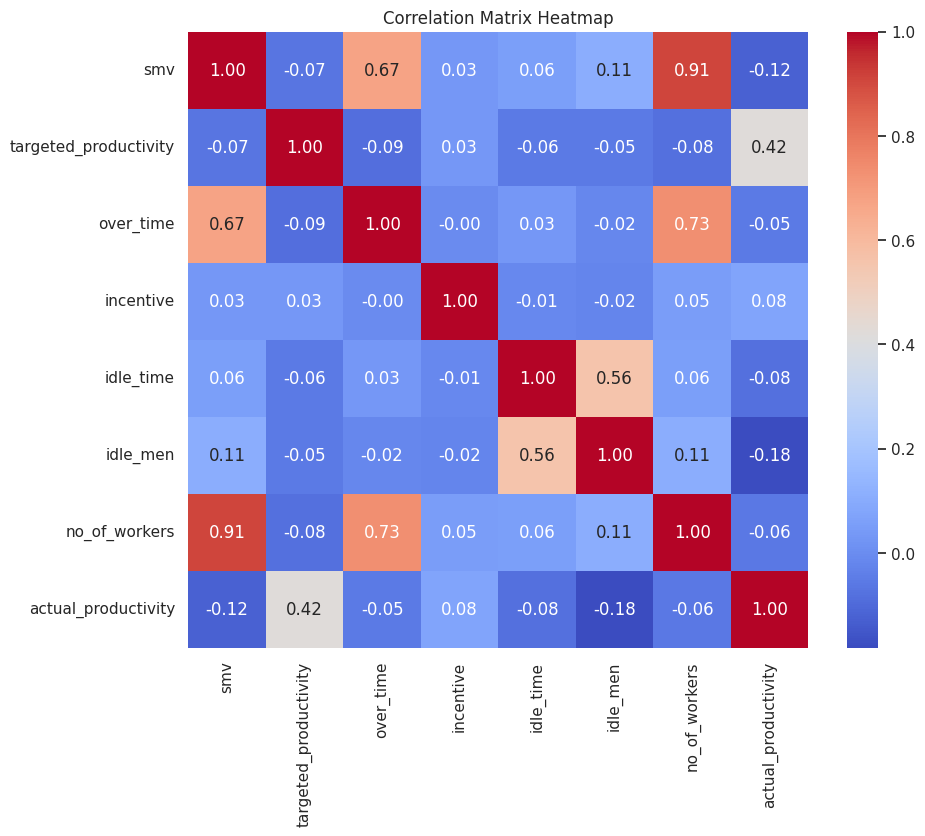

In [61]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[continuous_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

4- Final Data

In [62]:
summary = df.describe()  # Summary statistics for numerical columns
print(summary)

              team  targeted_productivity           smv    over_time  \
count  1197.000000           1.197000e+03  1.197000e+03  1197.000000   
mean      6.426901          -3.531938e-16  9.942849e-17     0.110047   
std       3.463963           1.000418e+00  1.000418e+00     0.606671   
min       1.000000          -6.741257e+00 -1.111853e+00    -0.717391   
25%       3.000000          -3.028349e-01 -1.016778e+00    -0.456522   
50%       6.000000           2.081510e-01  1.808523e-02     0.000000   
75%       9.000000           7.191368e-01  8.408561e-01     0.543478   
max      12.000000           7.191368e-01  3.610851e+00     3.978261   

         incentive    idle_time     idle_men  no_of_style_change  \
count  1197.000000  1197.000000  1197.000000         1197.000000   
mean     38.210526     0.730159     0.369256            0.150376   
std     160.182643    12.709757     3.268987            0.427848   
min       0.000000     0.000000     0.000000            0.000000   
25%       0